# Spotify Data Analysis
Spotify is the world's largest music streaming service providers, with over 356 million monthly active users, including 158 million paying subscribers, as of March 2021.

This notebook is made to analyse data from Spotify Tracks in US from 1922 - 2020.

Dataset was taken from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks 

![Spotify Logo](https://img.pravda.com/images/doc/7/a/7ab5ec2-mon-spotify-dpo-v1-1-1.jpg)

## Structure of dataset

### tracks.csv

#### Primary:
- id (Id of track generated by Spotify)

#### Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

#### Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

#### Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

### artists.csv

- id (Id of artist)
- name (Name of artist)
- followers (Total number of followers of artist)
- popularity (Popularity of given artist based on all his/her tracks)
- genres (Genres associated with this artist)

### dict_artists.json

{
"any": [
"first",
"second",
"third",
…,
"nth"
],
"blank": [],
"first: [
"any",
"third",
"second
],
…
}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing file

In [11]:
from zipfile import ZipFile
from google_drive_downloader import GoogleDriveDownloader as gdd

try:
    artist_data = pd.read_csv("artists.csv")
    tracks_data = pd.read_csv("tracks.csv")
    data_by_artist_o = pd.read_csv("data_by_artist_o.csv")
    data_by_genres_o = pd.read_csv("data_by_genres_o.csv")
    data_by_year_o = pd.read_csv("data_by_year_o.csv")
    data_o = pd.read_csv("data_o.csv")
except:
    gdd.download_file_from_google_drive(file_id='1CpTUywi3UWu_E61g0cwwMgRBcNudvEYc',
                                    dest_path='./Spotify.zip')
    with ZipFile('./Spotify.zip', 'r') as zipObj:
        zipObj.extractall()
        
    artist_data = pd.read_csv("artists.csv")
    tracks_data = pd.read_csv("tracks.csv")
    data_by_artist_o = pd.read_csv("data_by_artist_o.csv")
    data_by_genres_o = pd.read_csv("data_by_genres_o.csv")
    data_by_year_o = pd.read_csv("data_by_year_o.csv")
    data_o = pd.read_csv("data_o.csv")


In [12]:
artist_data.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [4]:
tracks_data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
tracks_data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [7]:
tracks_data.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

As we see, there are 71 tracks with empty name. For the sake of analysis, we can drop them as it will not affect any further exploration.

### Transforming data

In [8]:
tracks_data.dropna(inplace = True)
tracks_data['release_date'] = pd.to_datetime(tracks_data['release_date'])

In [9]:
tracks_data['year'] = tracks_data['release_date'].dt.year

In [10]:
tracks_data['artists'] = tracks_data.artists.str.replace("'",'').str.replace('[','').str.replace(']','').str.split(", ")
tracks_data['id_artists'] = tracks_data.id_artists.str.replace("'",'').str.replace('[','').str.replace(']','').str.split(", ")
artist_data['genres'] = artist_data.genres.str.replace("'",'').str.replace('[','').str.replace(']','').str.split(", ")

<ipython-input-10-f1aad94e351a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tracks_data['artists'] = tracks_data.artists.str.replace("'",'').str.replace('[','').str.replace(']','').str.split(", ")
<ipython-input-10-f1aad94e351a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tracks_data['id_artists'] = tracks_data.id_artists.str.replace("'",'').str.replace('[','').str.replace(']','').str.split(", ")
<ipython-input-10-f1aad94e351a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  artist_data['genres'] = artist_data.ge

## EDA

In [11]:
sns.set_style('darkgrid')

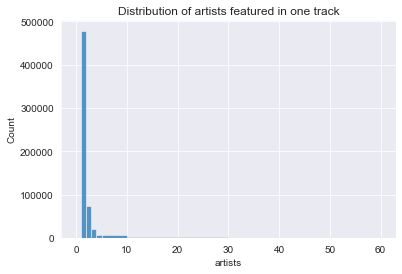

In [12]:
sns.histplot(tracks_data['artists'].apply(len),bins=[0,1,2,3,4,5,10,30,60])
plt.title('Distribution of artists featured in one track')
plt.show()

As we can see, most tracks have 1 artist only, but there are several outliers, with tracks reaching almost 60+ simultaneous featuring artists at once

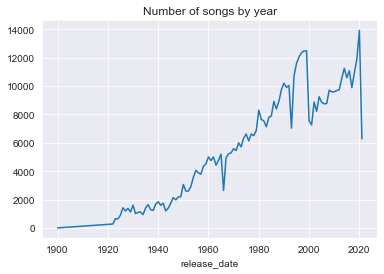

In [13]:
tracks_by_year = tracks_data['release_date'].groupby(tracks_data['release_date'].dt.year).count()
sns.lineplot(x = tracks_by_year.index, y = tracks_by_year.values)
plt.title('Number of songs by year')
plt.show()

As we can see, number of songs on Spotify gradually increased (with rapid growth in 90s and drop in 00s).

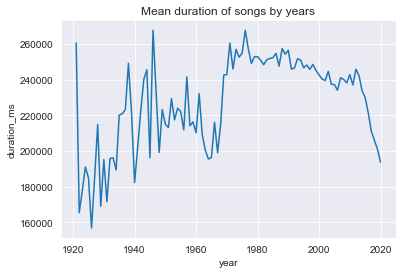

In [14]:
sns.lineplot(x = data_by_year_o.year, y = data_by_year_o.duration_ms)
plt.title('Mean duration of songs by years')
plt.show()

Mean duration of songs is steadily decreasing during last 10 years.

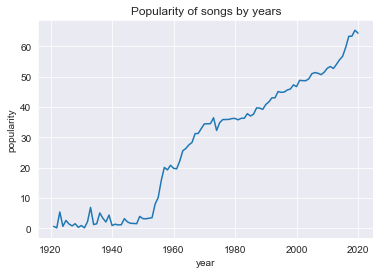

In [15]:
sns.lineplot(x = data_by_year_o.year, y = data_by_year_o.popularity)
plt.title('Popularity of songs by years')
plt.show()

Popularity of songs is higher depending on the year they were released, which is not surprising.

In [16]:
#minmax scaling tempo and loudness to (0,1)
data_by_year_o.tempo = (data_by_year_o.tempo - 50)/(150-50)
data_by_year_o.loudness = (data_by_year_o.loudness + 60)/(60)

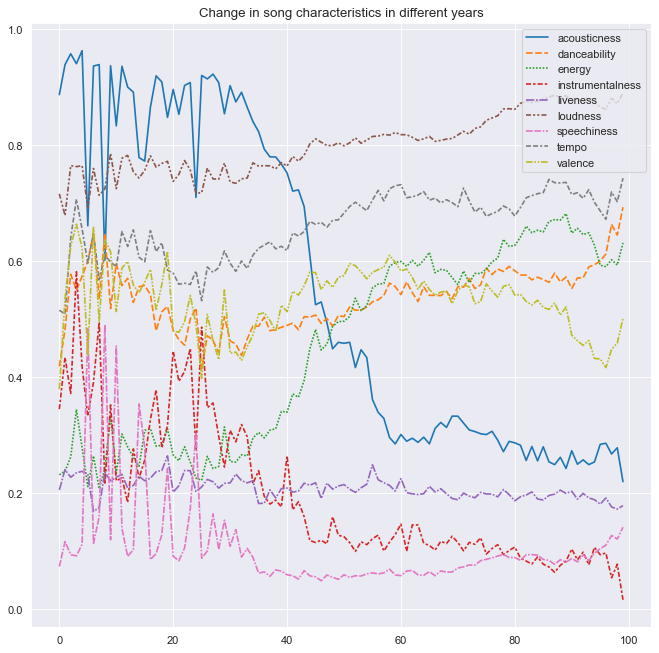

In [17]:
charact = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

years = np.linspace(1920,2020,5)

plt.figure(figsize=(10, 10), dpi=80)
sns.lineplot(data=data_by_year_o[charact])

plt.title('Change in song characteristics in different years')
plt.show()

There is a lot of interesting insights we can see from this data:
* Accousticness was high before 1950s and rapidly dropped after
* Danceability was steadily growing from 1950s
* Energy in tracks steadily grown from 1950s
* Instrumentalness of tracks steadily dropping (probably can be explained in development of audio manipulation software)
* Loudness steadily growing from 1922
* Mean speechiness dropped in average from 1950s, but slowly growing from 2000s
* Tempo drastically grown from 1950s to 1980s
* Valence had big drop in 2000s, but is slowly growing

## Finding most similar artists

In [18]:
#minmax scaling
data_by_artist_o.tempo = (data_by_artist_o.tempo - 50)/(150-50)
data_by_artist_o.loudness = (data_by_artist_o.loudness + 60)/(60)

 The easiest and most logical way to find most similar artist to any given is to find minimum distance based on their mean songs charachteristics. As distance, let's use classical euclidean one.

In [19]:
artist_charact = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

#TODO interactive
def find_most_similar_artist(artist):
    '''Find most similar artist using euclidean distance'''
    charact_data = data_by_artist_o.set_index('artists')[artist_charact]
    artist_char = charact_data.loc[artist]

    similar = (charact_data - artist_char).apply(np.linalg.norm, axis=1).drop(artist).sort_values().head(10)
    similar = round(100* (1-similar),1).reset_index()
    similar.columns=['artist','perc']

    fig,ax = plt.subplots(figsize =(10,10))
    sns.barplot(y = 'artist', x = 'perc', data = similar, orient='h')
    for container in ax.containers:
        ax.bar_label(container)

    plt.title(f'10 most similar artists to {artist}')
    plt.xlabel('Percentage of similarity')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()


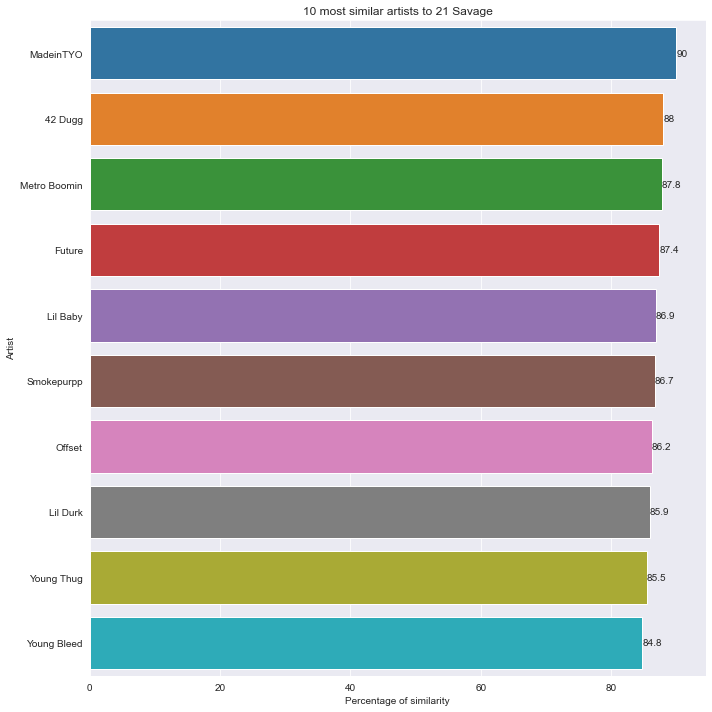

In [20]:
find_most_similar_artist('21 Savage')

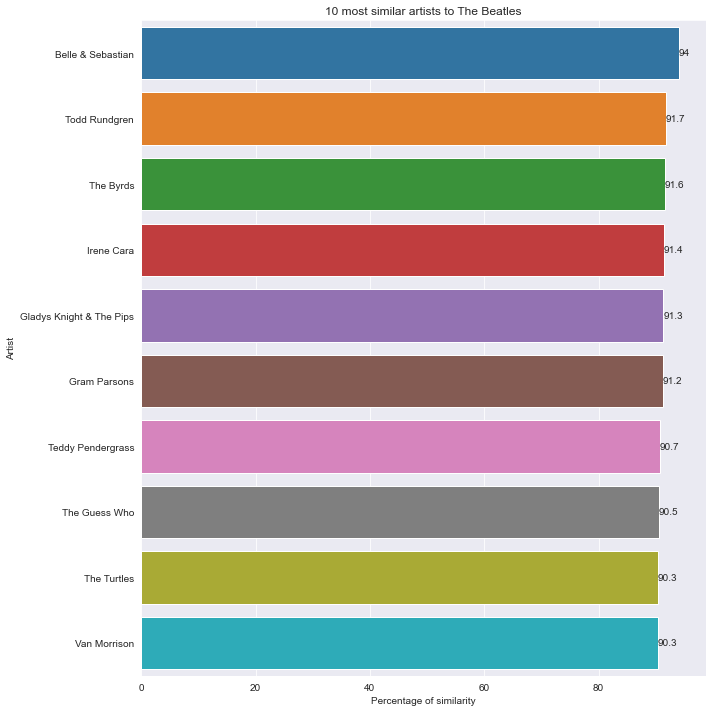

In [21]:
find_most_similar_artist('The Beatles')

Relying on Spotify ML algorithm of getting song characteristics can easily give listeners a new interesting artists, based on their favourites.

## Comparing most popular songs

Let's look at the songs with most popularity and compare their similar characteristics.

In [38]:
#minmax scaling
tracks_data.tempo = (tracks_data.tempo - 50)/(150-50)
tracks_data.loudness = (tracks_data.loudness + 60)/(60)

In [50]:
charact = ['danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

top_5_tracks = tracks_data.sort_values(
    'popularity', ascending=False)[['name', 'danceability', 'energy', 'loudness', 'speechiness',
                                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].head(5)

In [51]:
top_5_tracks


,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
93802,Peaches (feat. Daniel Caesar & Giveon),0.677,0.696,0.896983,0.1190,0.3210,0.000000,0.420,0.464,0.40030
93803,drivers license,0.585,0.436,0.853983,0.0601,0.7210,0.000013,0.105,0.132,0.93874
93804,Astronaut In The Ocean,0.778,0.695,0.885583,0.0913,0.1750,0.000000,0.150,0.472,0.99996
92811,telepatía,0.653,0.524,0.849733,0.0502,0.1120,0.000000,0.203,0.553,0.33970
92810,Save Your Tears,0.680,0.826,0.908550,0.0309,0.0212,0.000012,0.543,0.644,0.68051


In [52]:
import plotly.graph_objects as go

fig = go.Figure()

for index, row in top_5_tracks.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[charact],
        theta=charact,
        name=row['name'],
        fill = 'toself'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True
)

fig.show()


As we can see, despite different music characteristics in top 5 songs, generally they have a big value of loudness.

## Clustering Genres

In [24]:
data_by_genres_o.shape[0]

2973

As we can see, Spotify dataset has almost 3k genres, which is definitely a lot. Let's try to cluster all these genres into a super-genres, so we can classify them more easily. As clustering algorithm we will be using KMeans Clustering.

In [25]:
charact = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [26]:
#minmax scaling
data_by_genres_o.tempo = (data_by_genres_o.tempo - 50)/(150-50)
data_by_genres_o.loudness = (data_by_genres_o.loudness + 60)/(60)

In [27]:
cluster_data = data_by_genres_o[charact]

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We will try to determine appropriate number of clusters using elbow method and silhouette score using 5 to 100 clusters

In [29]:
kmeans_kwargs = {"init": "k-means++",
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42,}

sse = []
silhouette_coefficients = []
for k in range(5, 100):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cluster_data)
    sse.append(kmeans.inertia_)
    score = silhouette_score(cluster_data, kmeans.labels_)
    silhouette_coefficients.append(score)

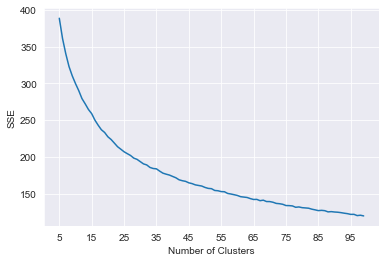

In [30]:
plt.plot(range(5, 100),sse)
plt.xticks(np.arange(5, 100,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

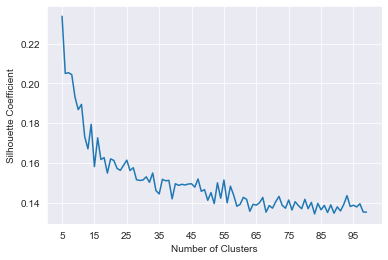

In [31]:
plt.plot(range(5, 100),silhouette_coefficients)
plt.xticks(np.arange(5, 100,10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Based on graphs, we can try 14 as appropriate number of clusters.

In [32]:
kmeans = KMeans(init="k-means++",
                n_clusters=14,
                n_init=10,
                max_iter=300,
                random_state=42)

kmeans.fit(cluster_data)

KMeans(n_clusters=14, random_state=42)

In [33]:
print(f'Lowest SSE: {kmeans.inertia_}')
print(f'Silhouette Score: {silhouette_score(cluster_data, kmeans.labels_)}')

Lowest SSE: 264.43001348601877
Silhouette Score: 0.17943057840072213


As we can see, silhouette score was pretty low (0.17), we can try using more sophisticated clustering algorithms, such as DBScan, but there is no guarantee that our score can be high enough (>0.5), because subgenres of music are very diverse and similar in their characteristics at the same time.

In [34]:
data_by_genres_o['super_genre'] = kmeans.labels_

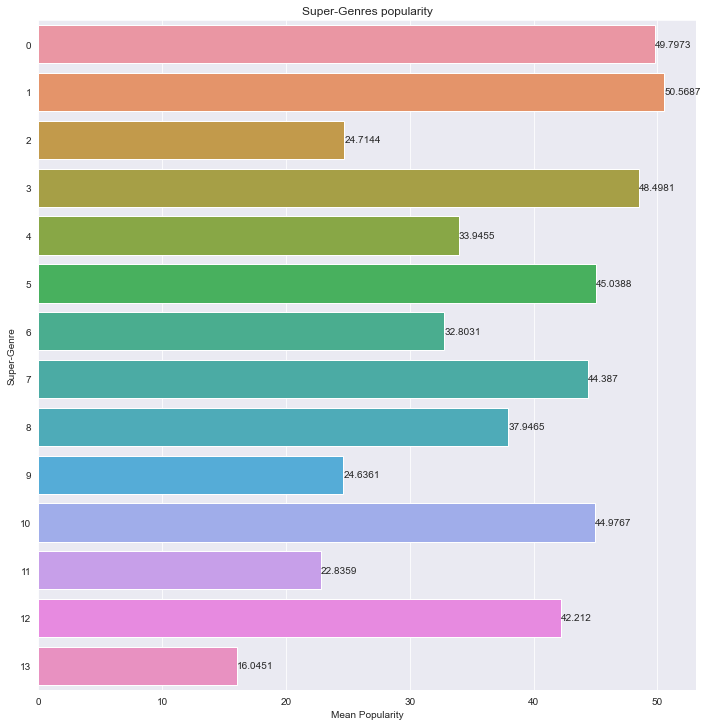

In [35]:
super_genres_df = data_by_genres_o.groupby('super_genre').mean().reset_index()

fig,ax = plt.subplots(figsize =(10,10))
sns.barplot(y = 'super_genre', x = 'popularity', data = super_genres_df , orient='h')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Mean Popularity')
plt.ylabel('Super-Genre')
plt.tight_layout()
plt.title('Super-Genres popularity')
plt.show()

## Predict Popularity rating
Lets try analyzing which features play the most important role in determining the popularity of the song and determine the rating outcome based on these features.

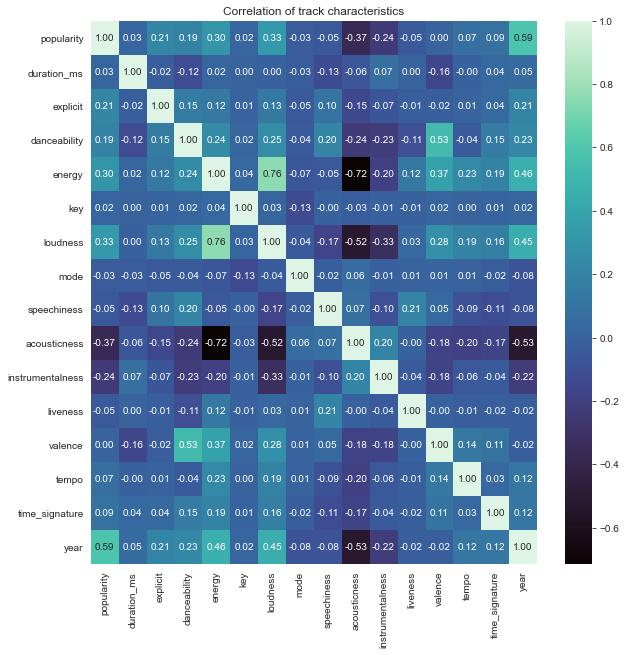

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tracks_data.corr(),annot=True,fmt='.2f', cmap="mako")
plt.title("Correlation of track characteristics")
plt.show()


As we can see from heatmap, there is some serious correlaton between energy - loudness and energy - acousticness.
Also there is some correlation between popularity and year which is not surprising.

As characteristics of tracks for regression algorithm let's choose ones below

In [37]:
charact = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [39]:
X = tracks_data[charact]
y = tracks_data.popularity

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def get_error(y_pred, y_true):
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False)}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"R^2: {r2_score(y_true, y_pred)}")


To speed-up ML algorithm lets use PCA to reduce dimensionality of data

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X)
reduced = pca.transform(X)
reduced.shape


(586601, 7)

As we can see using PCA, we reduced data to 7 independent variables, which explain 95% of variance

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
component_data = scaler.fit_transform(reduced)

component_data = pd.DataFrame(component_data)
component_data.columns = [f'component_{i+1}' for i in range(reduced.shape[1])]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    component_data, y, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

get_error(y_pred_lr, y_test)


MSE: 273.19525886726865
RMSE: 16.528619387815446
MAE: 13.429045748696325
R^2: 0.18384164264337044


Based on high error, i don't think that linear or polynomial regression would be able to do the job of predicting popularity. As we've seen from analysis, all of our characteristics are very complex and can't be that easily predicted. So only solution is to use ensemble methods or neural networks. Surely, model may suffer from overfitting, so we must tune it's parameters.

Let's try to implement Gradient Boosting Regression model to predict our data.

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_params = {'n_estimators': 1000,
              'max_depth': 3,
              'min_samples_split': 5,
              'learning_rate': 0.01,
              'loss': 'ls',
              'n_jobs': -1}

gbr = GradientBoostingRegressor(**gbr_params).fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

get_error(y_pred_gbr, y_test)


MSE: 253.87857979091083
RMSE: 15.933567704406657
MAE: 12.925416975119633
R^2: 0.24154933907233733


As we see, results got better but they are still pretty bad. Let's try to visualise feature importance.

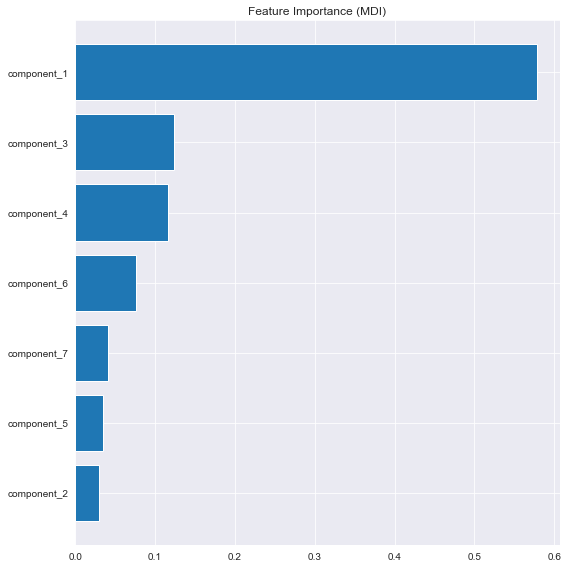

In [60]:
from sklearn.inspection import permutation_importance

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(component_data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


As we see, component_1 has the most effect in our GBR model.

### Conclusion

As we see, our ML models didn't give us the best performance. Next step will be to try to tune our GBR model using various hyperparameters to try to squeeze out better accuracy of predictions. Still, we cannot say that our model will be viable, because of nature of problem. Popularity of the song is complex characteristic and probably cannot be explained just by musical features.